In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [2]:
lo = pd.read_csv('Loan Prediction.csv')

In [3]:
lo

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
lo['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [5]:
lo['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
lo['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [7]:
lo['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
lo['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
lo["Gender"].replace(["Male","Female"],[1,0],inplace = True)

In [10]:
lo["Loan_Status"].replace(["Y","N"],[1,0],inplace = True)

In [11]:
lo["Self_Employed"].replace(["Yes","No"],[1,0],inplace = True)

In [12]:
lo["Education"].replace(["Graduate","Not Graduate"],[1,0],inplace = True)

In [13]:
lo["Married"].replace(["Yes","No"],[1,0],inplace = True)

In [14]:
lo.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
lo.dtypes 

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

we have gender,married,dependents and self employed columns as categorical variables they can be replaced by mode and other(numerical) null values should be replaced by mean

In [16]:
num = {'LoanAmount','Loan_Amount_Term'}
for i in num:
    lo[i]=lo[i].fillna(lo[i].mean())

In [17]:
lo.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
cat = {'Gender','Dependents','Self_Employed','Married','Credit_History','Property_Area'}
for i in cat:
    lo[i]=lo[i].fillna(lo[i].mode()[0])

In [19]:
# while we are at it lets convert categorical into num using labelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    lo[i] = le.fit_transform(lo[i].astype(str))
    

In [21]:
lo.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

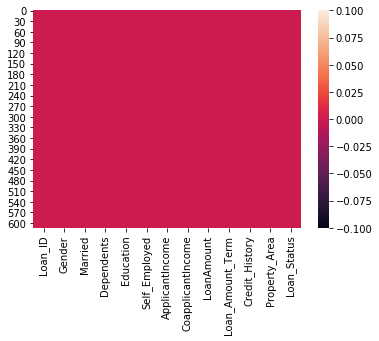

In [22]:
sns.heatmap(lo.isnull())

In [23]:
lo.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int64
dtype: object

Gender                  AxesSubplot(0.125,0.816017;0.133621x0.0639831)
Married              AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
Dependents            AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
Education            AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
Self_Employed        AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
ApplicantIncome         AxesSubplot(0.125,0.739237;0.133621x0.0639831)
CoapplicantIncome    AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
LoanAmount            AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
Loan_Amount_Term     AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
Credit_History       AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
Property_Area           AxesSubplot(0.125,0.662458;0.133621x0.0639831)
Loan_Status          AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
dtype: object

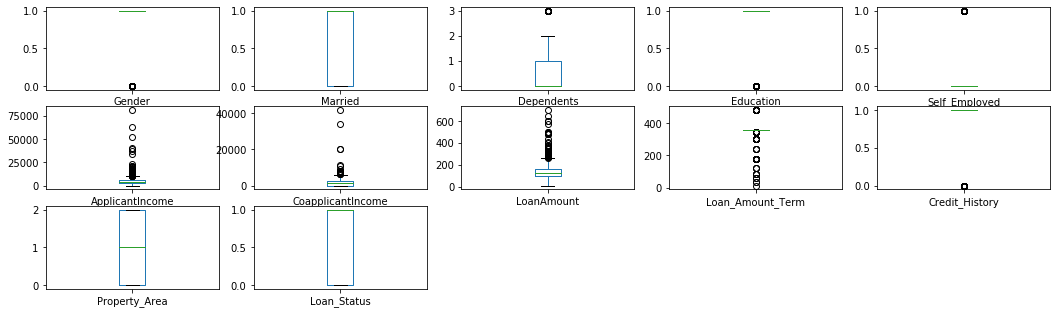

In [24]:
lo.plot(kind="box",subplots = True,layout=(10,5),figsize=(18,18))

In [25]:
lo.drop('Loan_ID',axis=1,inplace=True)

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(lo))
z
print(lo.shape)
loan =lo.loc[(z<3).all(axis=1)]
print(loan.shape)

(614, 12)
(577, 12)


In [27]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1,2,1


In [28]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

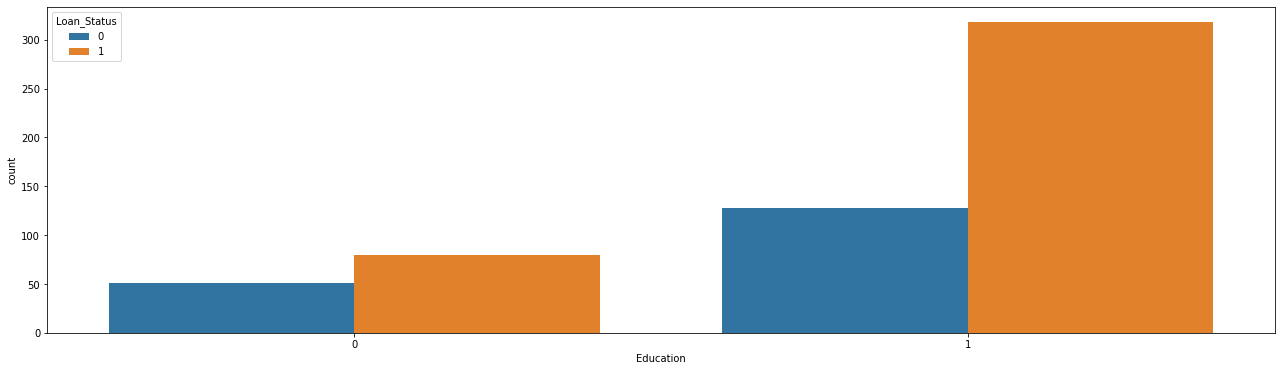

In [29]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Education",hue = "Loan_Status")
plt.show()

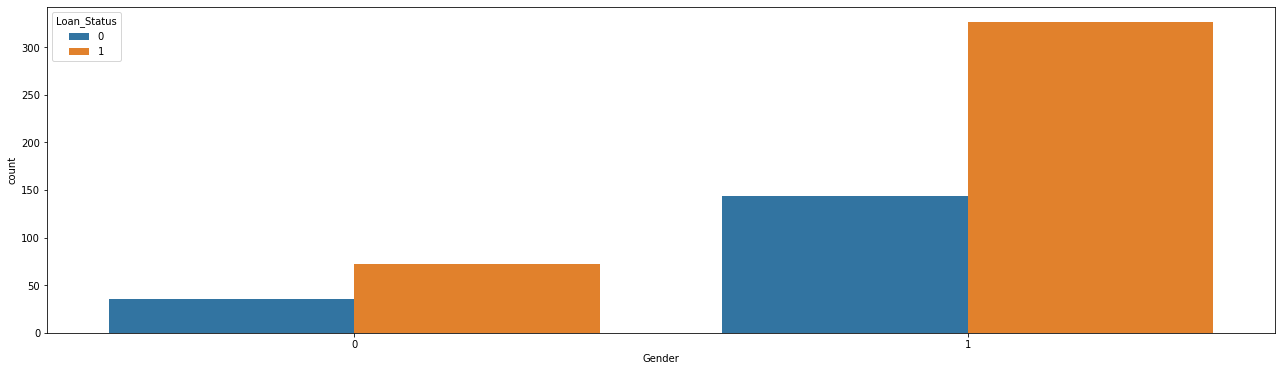

In [30]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Gender",hue = "Loan_Status")
plt.show()

In [31]:
# here above we can draw inference that number of males prevail in getting a loan

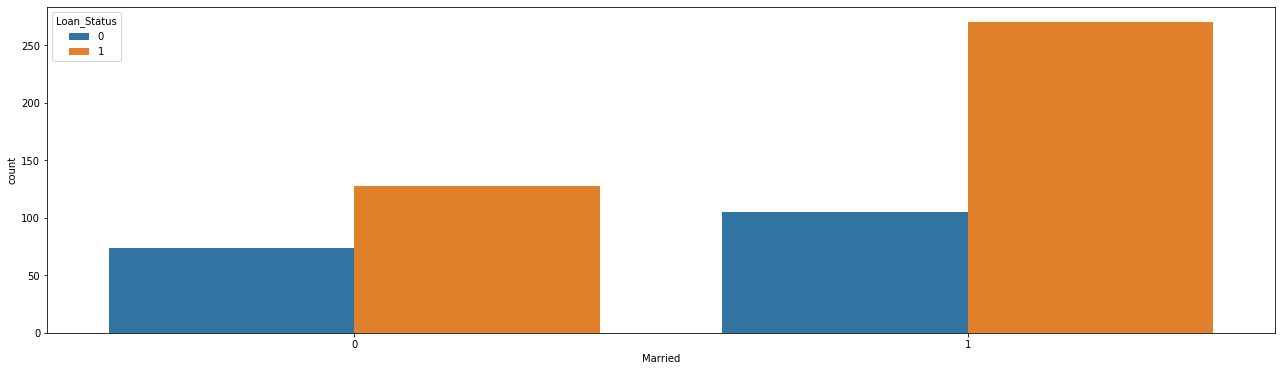

In [32]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Married",hue = "Loan_Status")
plt.show()

In [33]:
# here above we can draw inference that person who is married has high probability to get loan

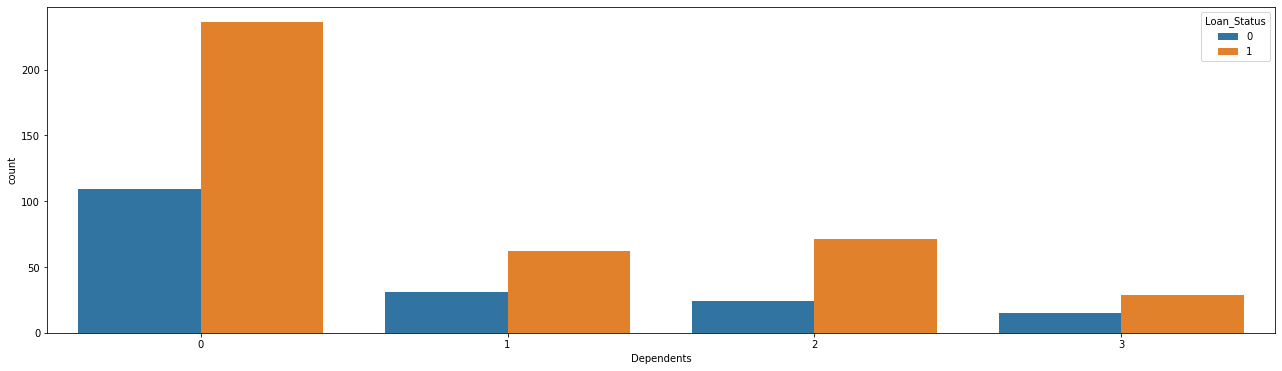

In [34]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Dependents",hue = "Loan_Status")
plt.show()

In [35]:
# here above we can draw inference that person wiith less numbeer of dependents are given loan very often

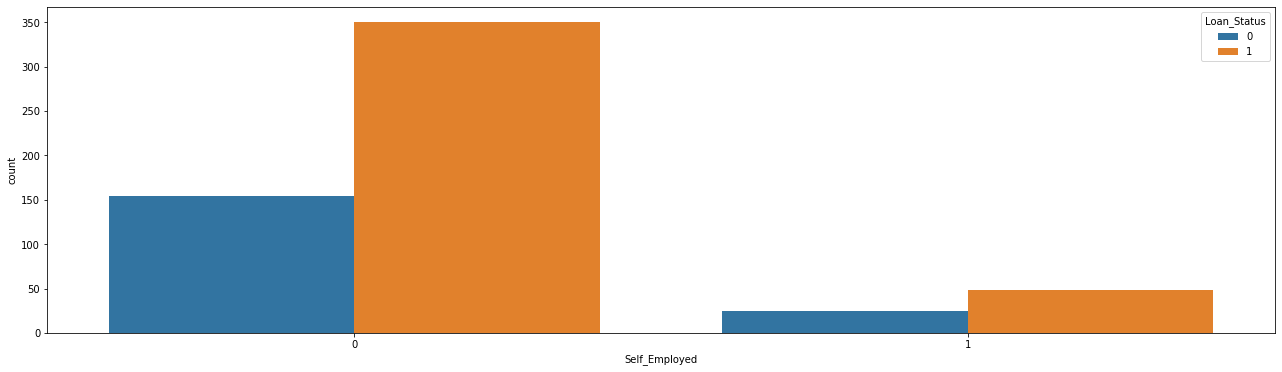

In [36]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Self_Employed",hue = "Loan_Status")
plt.show()

In [37]:
# here above we can draw inference that self employed person gets loan very less in compared to employed person

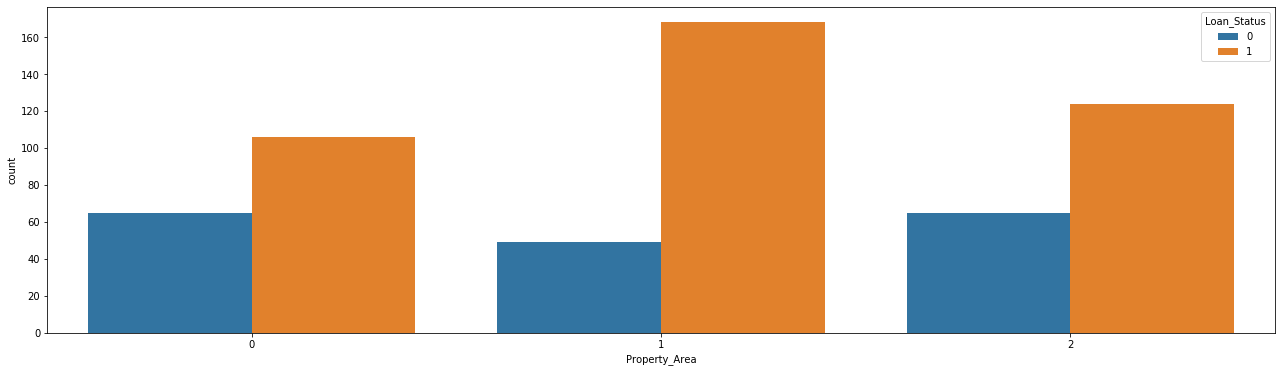

In [38]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Property_Area",hue = "Loan_Status")
plt.show() #not conclusive enough

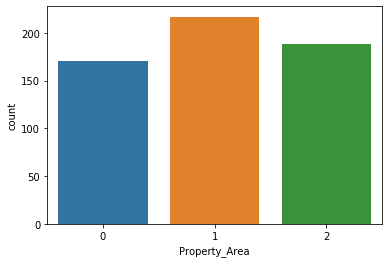

In [39]:
sns.countplot( loan["Property_Area"])

In [40]:
# people living is sub urbs gets more loan than the other 2

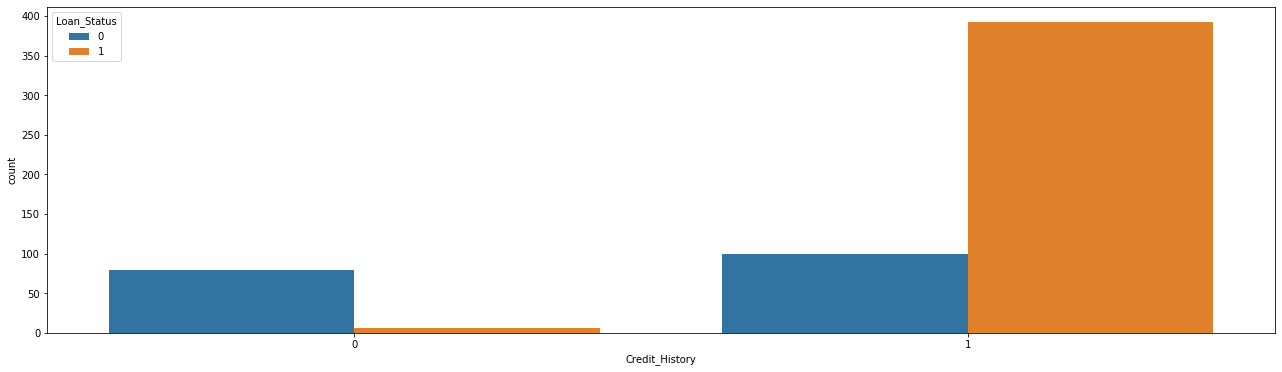

In [41]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Credit_History",hue = "Loan_Status")
plt.show()

In [42]:
#here graph shows that the persons with good(1) credit history gets loan easily as compared to those who have bad(0)

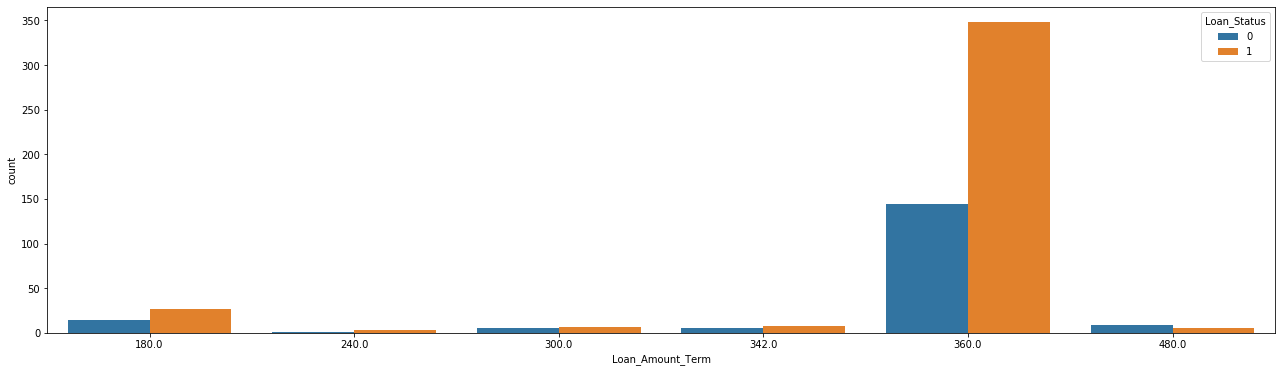

In [43]:
plt.figure(figsize=(22,6))
sns.countplot( data = loan, x="Loan_Amount_Term",hue = "Loan_Status")
plt.show()

In [44]:
#here graph shows that the person with amount loan duration of 15 years (360 months) have maximum number 

In [45]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

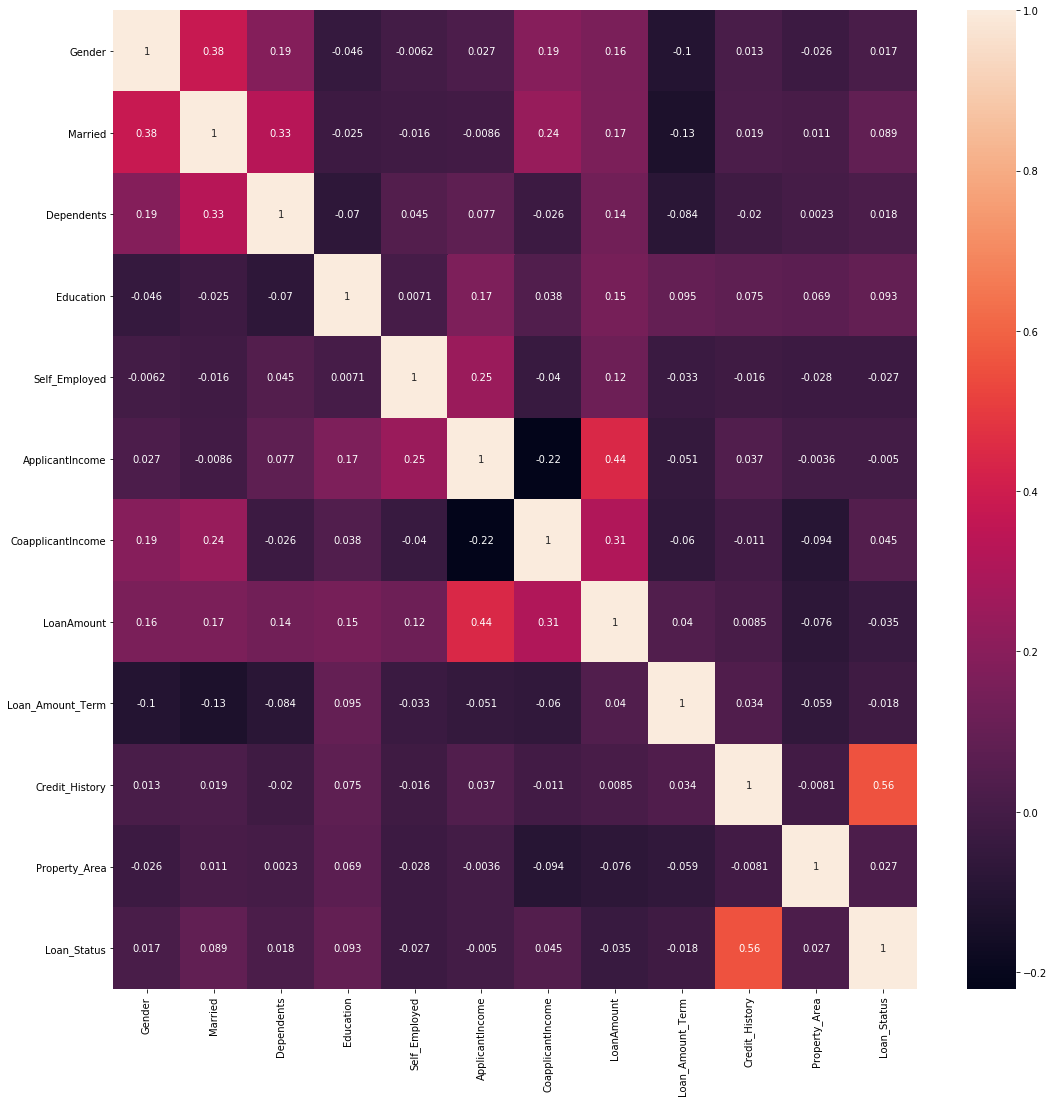

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(loan.corr(),annot= True)
plt.show()

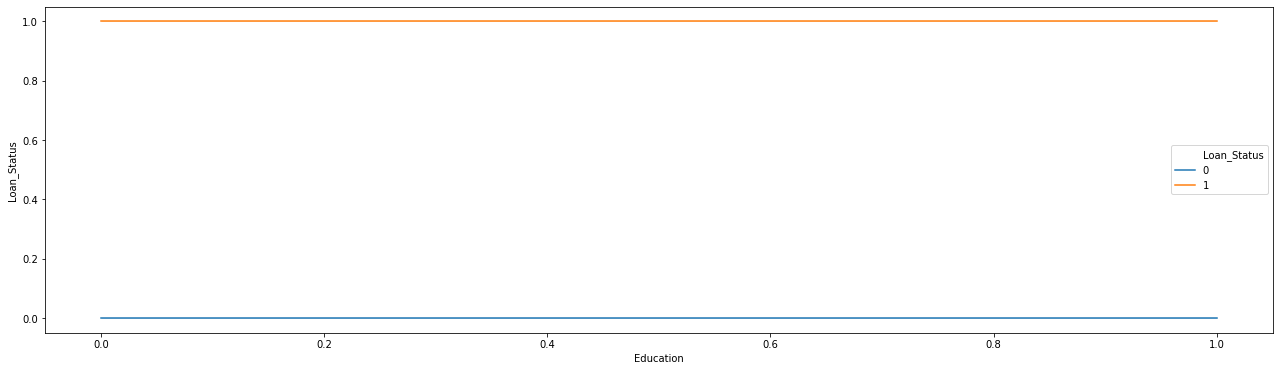

In [47]:
plt.figure(figsize=(22,6))
sns.lineplot( data = loan, x="Education",y='Loan_Status',hue = "Loan_Status")
plt.show()

In [48]:
# lineplot is not usefull

In [49]:
loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

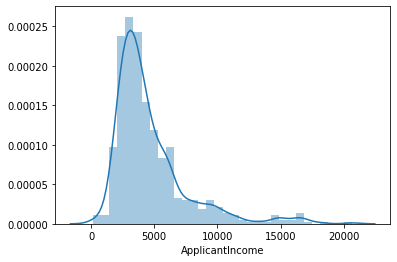

In [50]:
sns.distplot(loan['ApplicantIncome'])

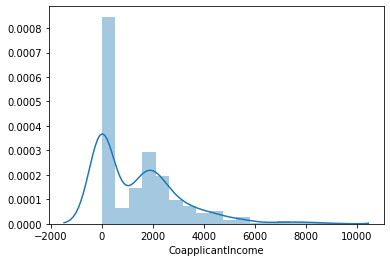

In [51]:
sns.distplot(loan["CoapplicantIncome"])

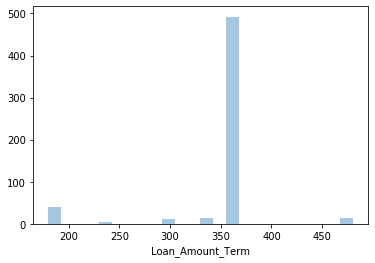

In [52]:
sns.distplot(loan["Loan_Amount_Term"],kde= False)

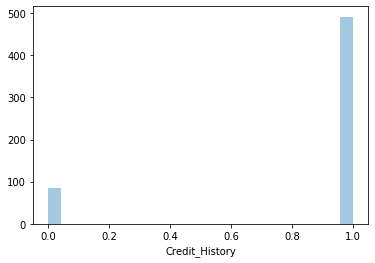

In [53]:
sns.distplot(loan["Credit_History"],kde= False)

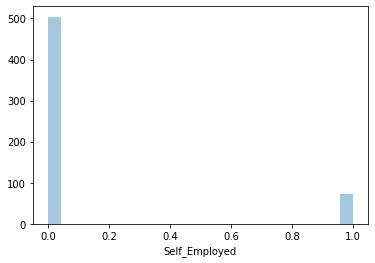

In [54]:
sns.distplot(loan["Self_Employed"],kde= False)

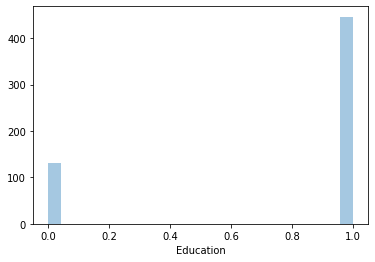

In [55]:
sns.distplot(loan["Education"],kde= False)

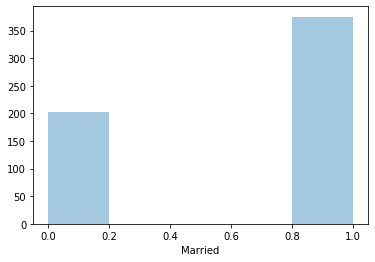

In [56]:
sns.distplot(loan["Married"],kde= False)

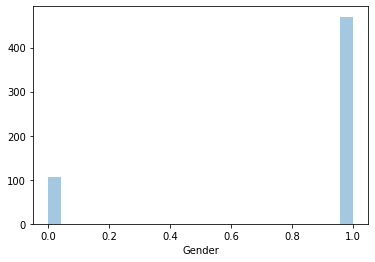

In [57]:
sns.distplot(loan["Gender"],kde= False)

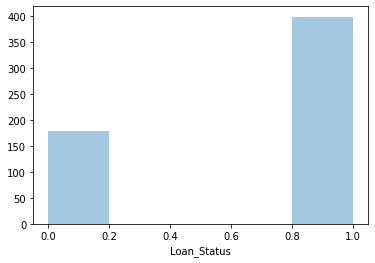

In [58]:
sns.distplot(loan["Loan_Status"],kde= False)

In [59]:
# Nothing much Derived only skewness was observed ,time to treat it

here I assume that total income of the individual plays important role so ApplicantIncome and Coapplicant income should be taken combinedly

In [60]:
loan['Income'] = loan["ApplicantIncome"]+loan["CoapplicantIncome"]

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
loan.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
loan

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,1,0,0,1,0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,1,0,128.000000,360.0,1,0,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1,2,1,3000.0
3,1,1,0,0,0,120.000000,360.0,1,2,1,4941.0
4,1,0,0,1,0,141.000000,360.0,1,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.000000,360.0,1,0,1,2900.0
610,1,1,3,1,0,40.000000,180.0,1,0,1,4106.0
611,1,1,1,1,0,253.000000,360.0,1,2,1,8312.0
612,1,1,2,1,0,187.000000,360.0,1,2,1,7583.0


In [63]:
x = loan.drop(["Loan_Status"],axis=1)
y= loan["Loan_Status"]
df_x =loan.drop(["Loan_Status"],axis=1)

In [64]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.316078,0.142609,0.418513,1.194806,0.196237
1,0.477137,0.733939,0.902869,0.541961,-0.380580,-0.015871,0.142609,0.418513,-1.340199,0.285858
2,0.477137,0.733939,-0.809243,0.541961,2.627567,-1.443112,0.142609,0.418513,1.194806,-1.405629
3,0.477137,0.733939,-0.809243,-1.845150,-0.380580,-0.169860,0.142609,0.418513,1.194806,-0.185746
4,0.477137,-1.362511,-0.809243,0.541961,-0.380580,0.221481,0.142609,0.418513,1.194806,0.252679
...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,0.541961,-0.380580,-1.301481,0.142609,0.418513,-1.340199,-1.493667
573,0.477137,0.733939,1.533596,0.541961,-0.380580,-2.321865,-2.559206,0.418513,-1.340199,-0.622195
574,0.477137,0.733939,0.902869,0.541961,-0.380580,1.838099,0.142609,0.418513,1.194806,0.946187
575,0.477137,0.733939,1.344671,0.541961,-0.380580,0.961555,0.142609,0.418513,1.194806,0.756080


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [66]:
x.skew() # little skewness is removed

Gender             -1.622920
Married            -0.630211
Dependents          0.478360
Education          -1.306588
Self_Employed       2.252848
LoanAmount          0.047692
Loan_Amount_Term    0.718470
Credit_History     -1.976043
Property_Area      -0.155094
Income             -0.002577
dtype: float64

In [67]:
# here I assume that total income of the indivi

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [69]:
x_train.shape

(386, 10)

In [70]:
y_train.shape

(386,)

In [71]:
x_test.shape


(191, 10)

In [72]:
y_test.shape

(191,)

In [73]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()


In [74]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 16}

In [75]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 19}

In [76]:
knn =KNeighborsClassifier(n_neighbors=16 )
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 19)
lr = LogisticRegression()
gnb = GaussianNB()

In [77]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("KNeighborsClassifier",knn))
models.append(("LogisticRegression",lr))
models.append(("GaussianNB",gnb))
models.append(("RandomForestClassifier",rfc))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')


Accuracy score =  0.837696335078534


cross_val_score=  0.8164246823956443


roc_auc_score =  0.7461832061068703


Classification_Report
               precision    recall  f1-score   support

           0       0.97      0.50      0.66        60
           1       0.81      0.99      0.89       131

    accuracy                           0.84       191
   macro avg       0.89      0.75      0.78       191
weighted avg       0.86      0.84      0.82       191



[[ 30  30]
 [  1 130]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  

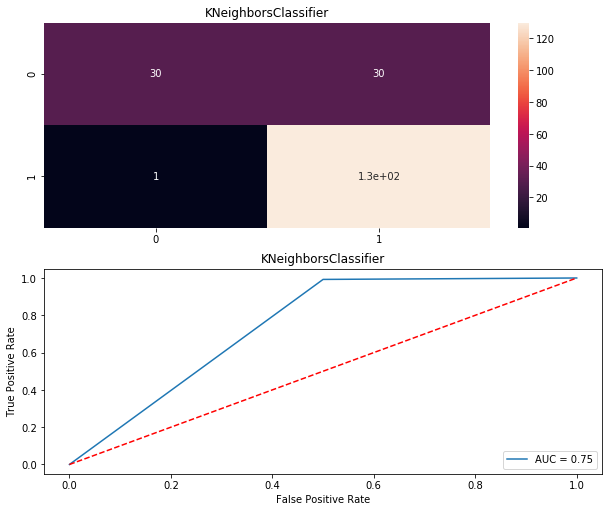

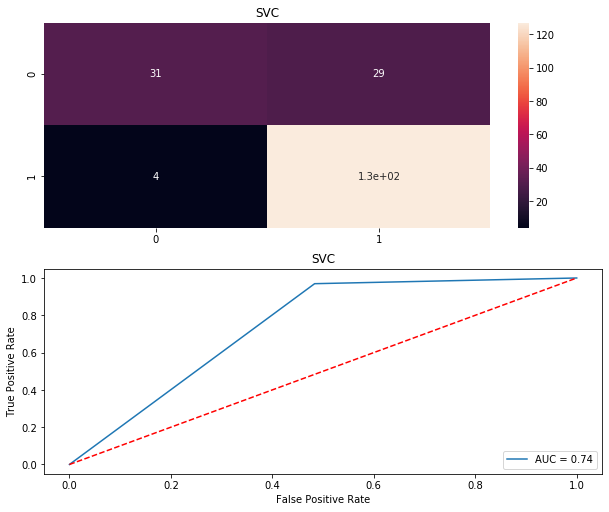

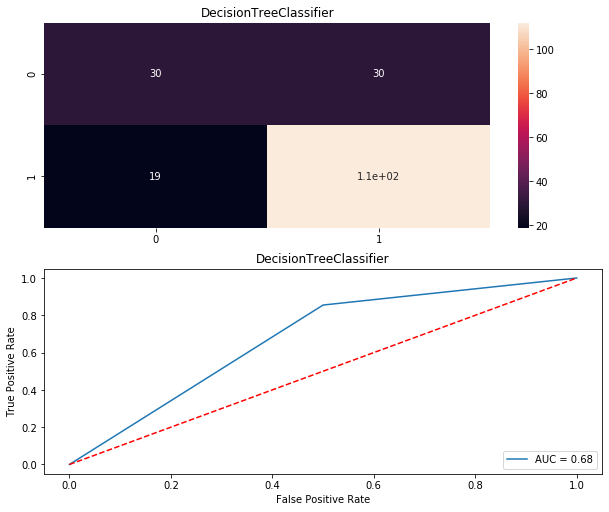

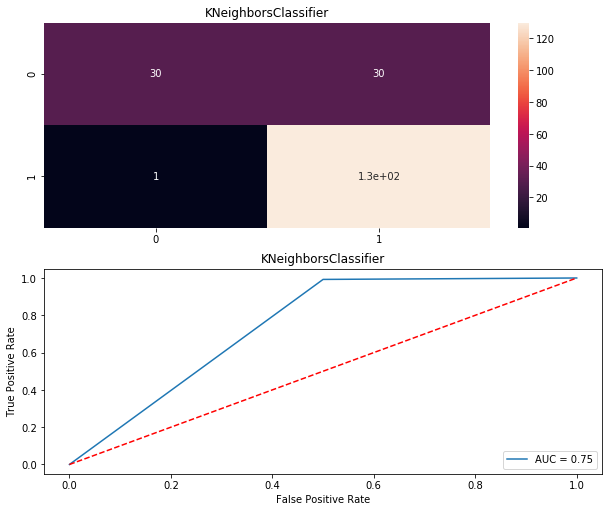

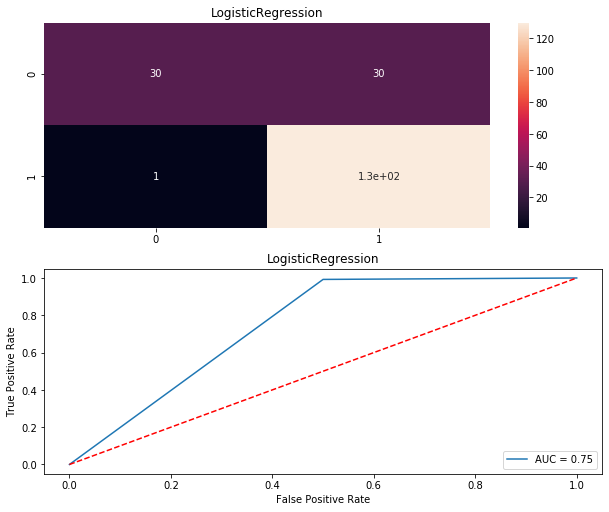

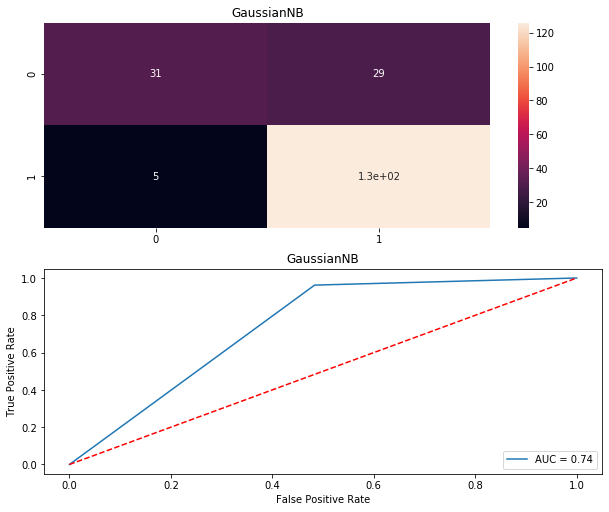

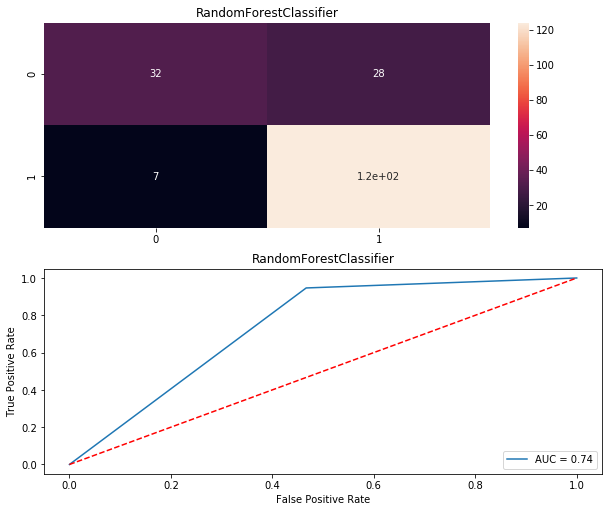

In [78]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [79]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,83.769634,81.642468,74.618321
1,SVC,82.722513,81.811857,74.306616
2,DecisionTreeClassifier,74.345550,72.776770,67.748092
3,KNeighborsClassifier,83.769634,81.642468,74.618321
4,LogisticRegression,83.769634,81.990321,74.618321
5,GaussianNB,82.198953,81.636419,73.924936
6,RandomForestClassifier,81.675393,78.696310,73.994911


Here Logistic Regression is the best fit mode as it gives best cross validation score

In [80]:
from sklearn.externals import joblib

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [81]:
joblib.dump(lr,"Fraud Loan Detection.obj")

['Fraud Loan Detection.obj']

In [82]:
model.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)